In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf

%matplotlib inline

# **Training Data**

In [2]:
df = pd.read_excel('Data_Train.xlsx', index_col=0)
print(df.shape)
df.head()

(9668, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Avianca Brasil,24/03/2019,Rio de Janeiro,Belo Horizonte,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,249.41
1,Azul,1/05/2019,Vitória,Rio de Janeiro,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,490.37
2,LATAM,9/06/2019,Belo Horizonte,São Paulo,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,888.45
3,Avianca Brasil,12/05/2019,Vitória,Rio de Janeiro,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,397.95
4,Avianca Brasil,01/03/2019,Rio de Janeiro,Belo Horizonte,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,851.33


## **Auto EDA**

In [ ]:
pf.ProfileReport(df)

## **Feature engineering**

In [4]:
# Removing the missing values

df.dropna(how='any', inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Date of journey

In [5]:
# formatting the date columns to the date format

df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10676     1/05/2019
10677    21/05/2019
10679    27/04/2019
10680    27/04/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 9667, dtype: object

In [6]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day 
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,Avianca Brasil,2019-03-24,Rio de Janeiro,Belo Horizonte,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,249.41,24,3
1,Azul,2019-05-01,Vitória,Rio de Janeiro,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,490.37,1,5
2,LATAM,2019-06-09,Belo Horizonte,São Paulo,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,888.45,9,6
3,Avianca Brasil,2019-05-12,Vitória,Rio de Janeiro,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,397.95,12,5
4,Avianca Brasil,2019-03-01,Rio de Janeiro,Belo Horizonte,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,851.33,1,3


In [8]:
df.drop(columns='Date_of_Journey', axis=1, inplace=True)

Departure time

In [9]:
df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10676    10:20
10677    05:55
10679    20:45
10680    08:20
10682    10:55
Name: Dep_Time, Length: 9667, dtype: object

In [10]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = (df['Dep_Time']).dt.hour
df['Dep_Minute'] = (df['Dep_Time']).dt.minute

In [11]:
df.drop(columns='Dep_Time', axis=1, inplace=True)

Arrival time

In [12]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = (df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = (df['Arrival_Time']).dt.minute

In [13]:
df.drop(columns='Arrival_Time', axis=1, inplace=True)

Duration time

In [14]:
duration=df['Duration'].str.split(' ',expand=True) #split duration data points based on space ' '
duration

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10676,8h,40m
10677,2h,40m
10679,2h,35m
10680,3h,None


In [15]:
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
duration

,0,1
0,2h,50m
1,7h,25m
2,19h,00m
3,5h,25m
4,4h,45m
...,...,...
10676,8h,40m
10677,2h,40m
10679,2h,35m
10680,3h,00m


In [16]:
df['Duration_Hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['Duration_Hr']

0         2
1         7
2        19
3         5
4         4
         ..
10676     8
10677     2
10679     2
10680     3
10682     8
Name: Duration_Hr, Length: 9667, dtype: object

In [17]:
df['Duration_Min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')
df['Duration_Min']

0        50
1        25
2        00
3        25
4        45
         ..
10676    40
10677    40
10679    35
10680    00
10682    20
Name: Duration_Min, Length: 9667, dtype: object

In [18]:
df.drop(columns='Duration', axis=1, inplace=True)

## **Manual EDA**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9667 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           9667 non-null   object 
 1   Source            9667 non-null   object 
 2   Destination       9667 non-null   object 
 3   Route             9667 non-null   object 
 4   Total_Stops       9667 non-null   object 
 5   Additional_Info   9667 non-null   object 
 6   Price             9667 non-null   float64
 7   Day_of_Journey    9667 non-null   int64  
 8   Month_of_Journey  9667 non-null   int64  
 9   Dep_Hour          9667 non-null   int64  
 10  Dep_Minute        9667 non-null   int64  
 11  Arrival_Hour      9667 non-null   int64  
 12  Arrival_Minute    9667 non-null   int64  
 13  Duration_Hr       9667 non-null   object 
 14  Duration_Min      9667 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 1.2+ MB


In [20]:
df.isna().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Day_of_Journey      0
Month_of_Journey    0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
Duration_Hr         0
Duration_Min        0
dtype: int64

Airline x Price

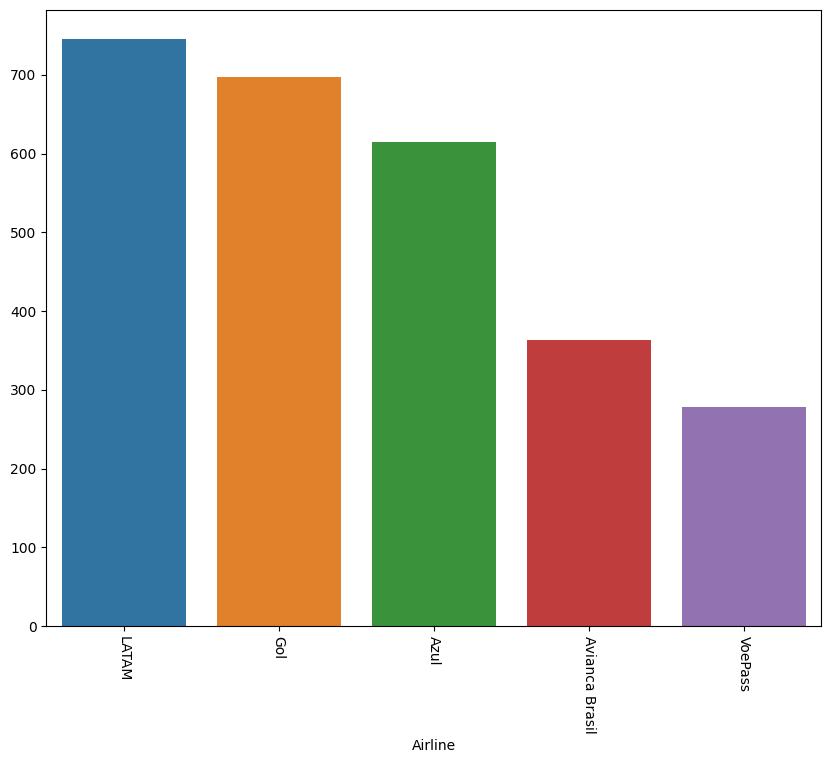

In [21]:
Airprices = df.groupby(df.Airline)['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=Airprices.index, y=Airprices.values, orient='v')
plt.xticks(rotation=270)

plt.show()

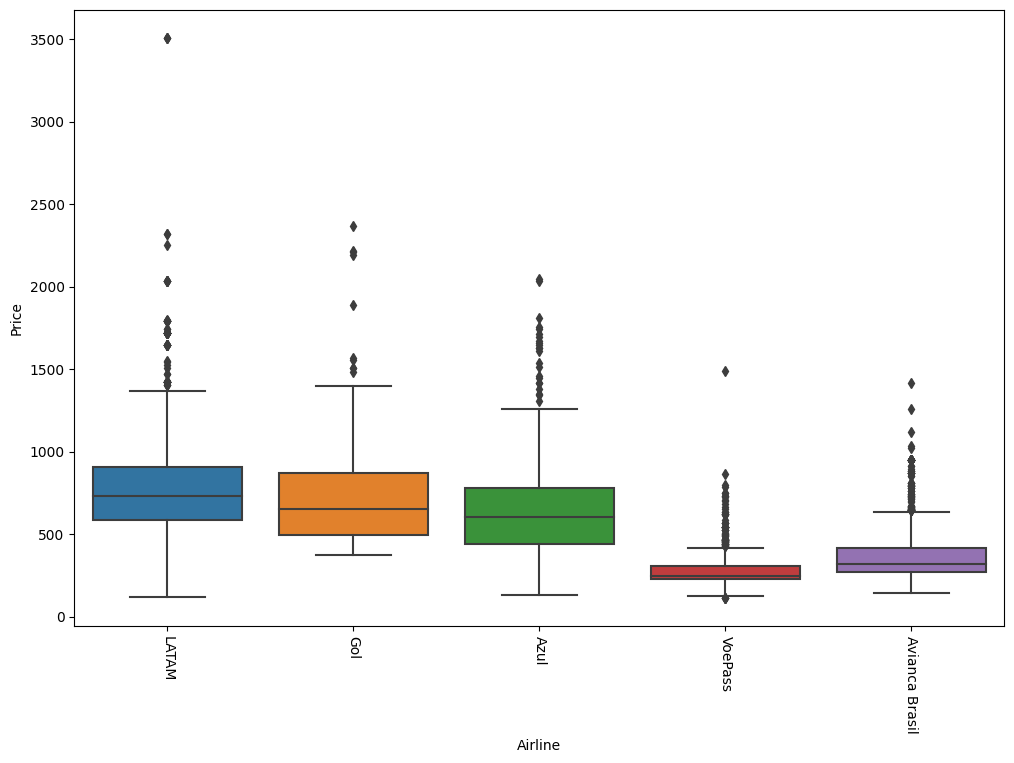

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df.sort_values(by='Price', ascending=False), x='Airline', y='Price')
plt.xticks(rotation=270)
plt.show()

Airline x stops by price

In [23]:
df.groupby([df.Airline, df.Total_Stops])['Price'].mean()

Airline         Total_Stops
Avianca Brasil  1 stop          454.701627
                2 stops         480.482105
                non-stop        302.796019
Azul            1 stop          578.657037
                2 stops         773.937090
                3 stops         781.314324
                4 stops        1131.900000
                non-stop        358.739856
Gol             1 stop          685.524148
                2 stops         947.800698
                3 stops        1106.740000
LATAM           1 stop          800.815984
                2 stops         856.785456
                non-stop        395.205987
VoePass         1 stop          432.036554
                non-stop        243.546597
Name: Price, dtype: float64

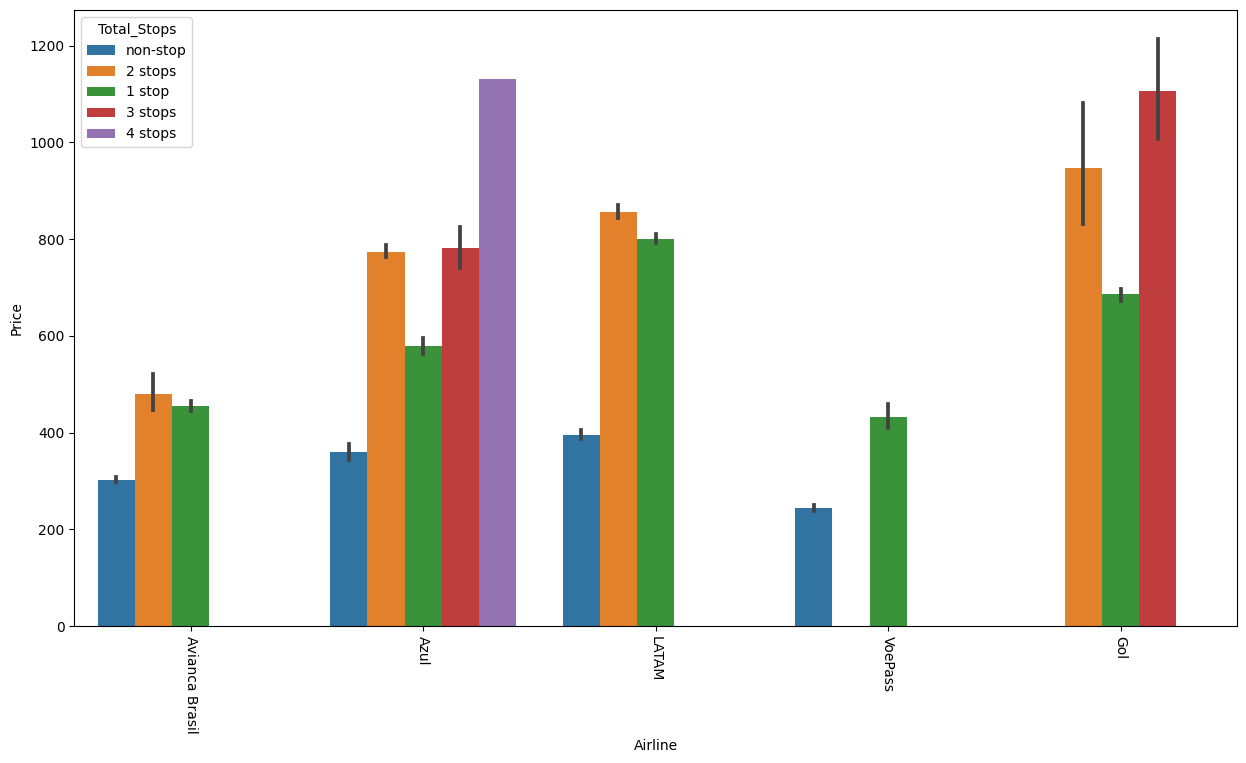

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x=df.Airline, y=df.Price, hue=df.Total_Stops)
plt.xticks(rotation=270)

plt.show()

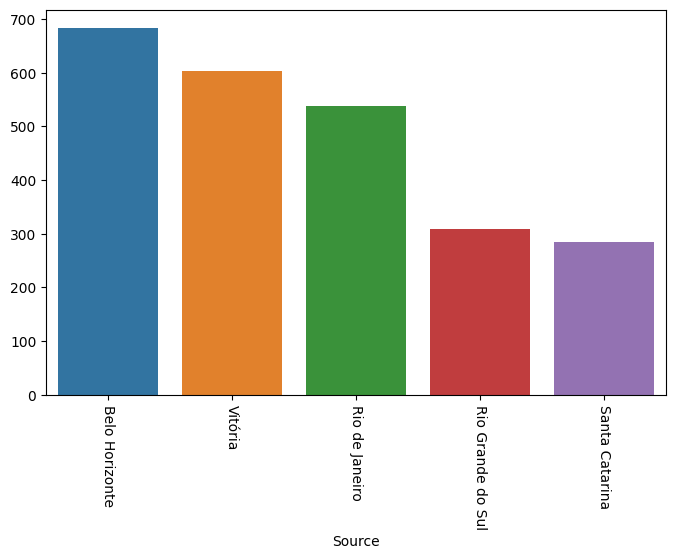

In [25]:
plt.figure(figsize=(8,5))

Source_prices = df.groupby(df.Source)['Price'].mean().sort_values(ascending=False)
sns.barplot(x=Source_prices.index, y=Source_prices.values)
plt.xticks(rotation=270)
plt.show()

Price by destination

In [26]:
Dest_prices = df.groupby(df.Destination)['Price'].mean().sort_values(ascending=False)
Dest_prices

Destination
São Paulo         683.657081
Rio de Janeiro    602.857027
Belo Horizonte    538.041151
Salvador          308.015364
Vitória           283.669822
Name: Price, dtype: float64

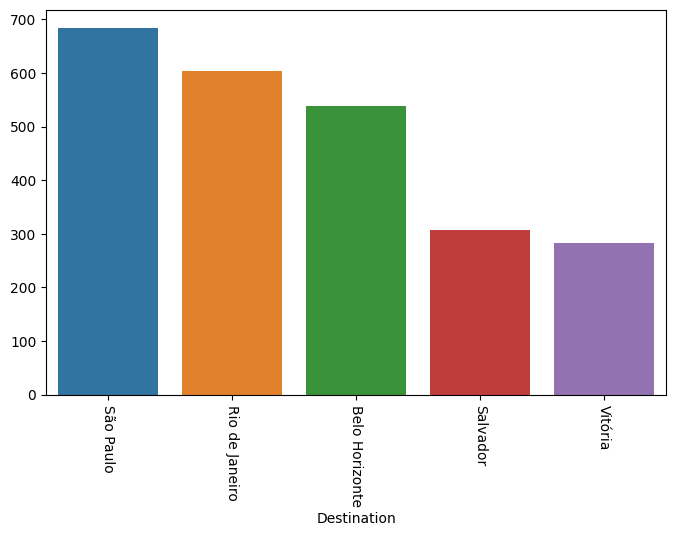

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x=Dest_prices.index, y=Dest_prices.values)
plt.xticks(rotation=270)

plt.show()

## **More Feature Engineering**

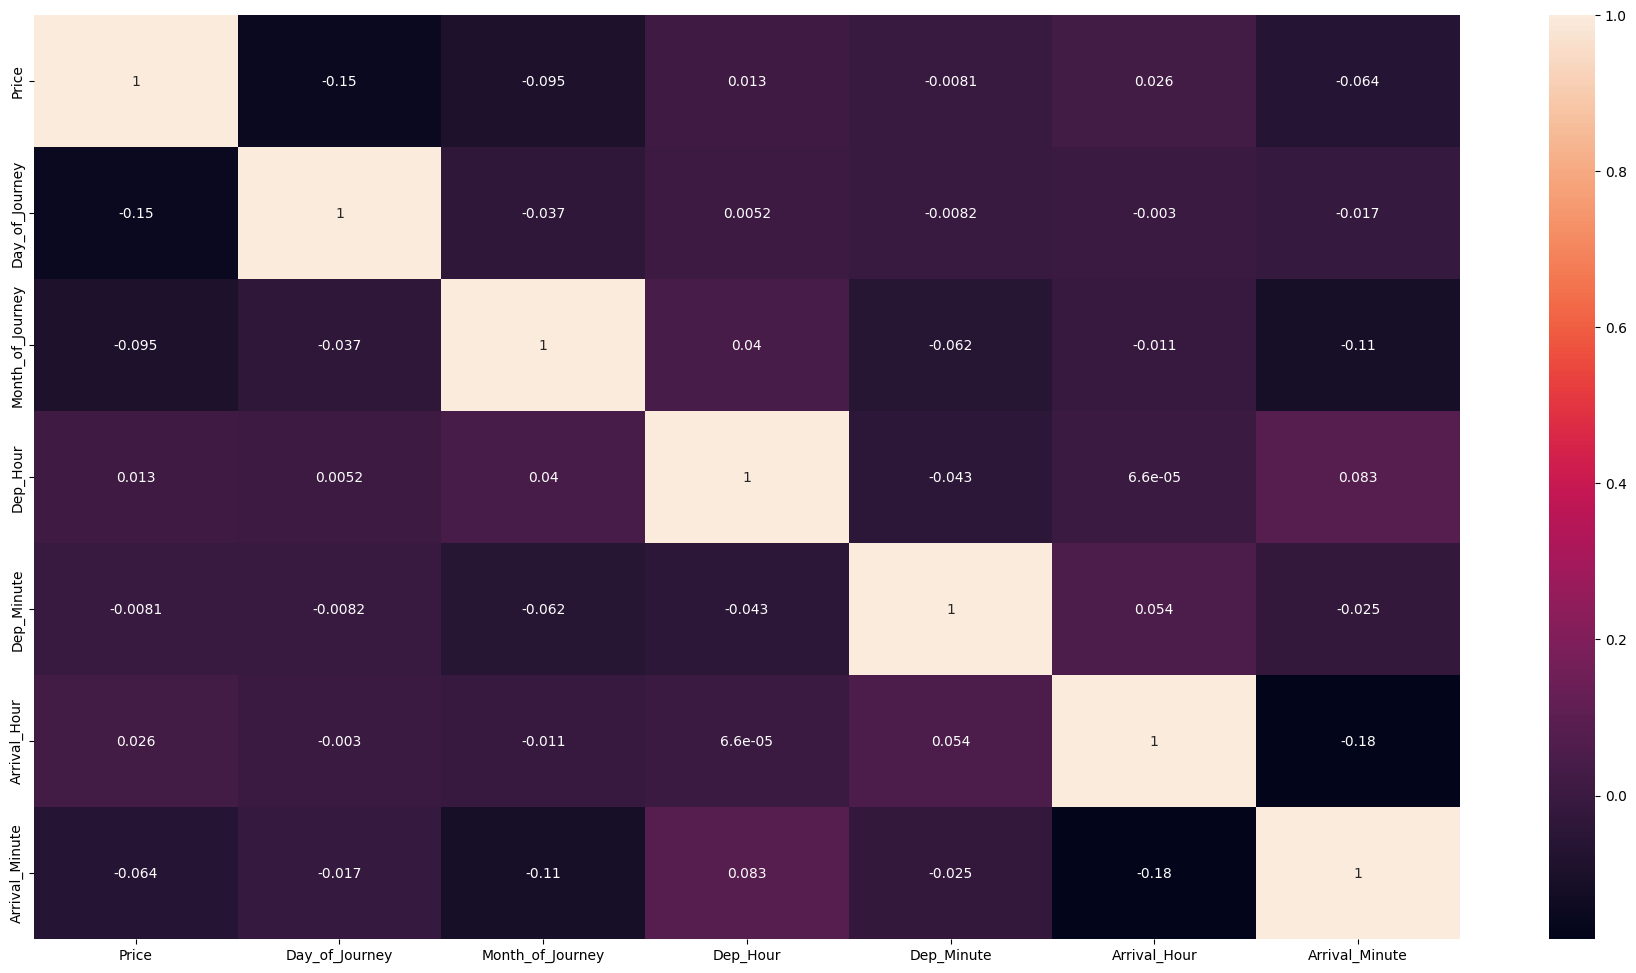

In [28]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [29]:
dummies = pd.get_dummies(df[['Total_Stops', 'Airline', 'Source', 'Destination']], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,...,Airline_LATAM,Airline_VoePass,Source_Rio Grande do Sul,Source_Rio de Janeiro,Source_Santa Catarina,Source_Vitória,Destination_Rio de Janeiro,Destination_Salvador,Destination_São Paulo,Destination_Vitória
0,Avianca Brasil,Rio de Janeiro,Belo Horizonte,BLR → DEL,non-stop,No info,249.41,24,3,22,...,0,0,0,1,0,0,0,0,0,0
1,Azul,Vitória,Rio de Janeiro,CCU → IXR → BBI → BLR,2 stops,No info,490.37,1,5,5,...,0,0,0,0,0,1,1,0,0,0
2,LATAM,Belo Horizonte,São Paulo,DEL → LKO → BOM → COK,2 stops,No info,888.45,9,6,9,...,1,0,0,0,0,0,0,0,1,0
3,Avianca Brasil,Vitória,Rio de Janeiro,CCU → NAG → BLR,1 stop,No info,397.95,12,5,18,...,0,0,0,0,0,1,1,0,0,0
4,Avianca Brasil,Rio de Janeiro,Belo Horizonte,BLR → NAG → DEL,1 stop,No info,851.33,1,3,16,...,0,0,0,1,0,0,0,0,0,0


In [30]:
dummies

,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Airline_Azul,Airline_Gol,Airline_LATAM,Airline_VoePass,Source_Rio Grande do Sul,Source_Rio de Janeiro,Source_Santa Catarina,Source_Vitória,Destination_Rio de Janeiro,Destination_Salvador,Destination_São Paulo,Destination_Vitória
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10677,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
10679,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0
10680,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0


In [31]:
df.drop(['Total_Stops', 'Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [32]:
print(df.shape)
df.head()

(9667, 27)


,Route,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hr,...,Airline_LATAM,Airline_VoePass,Source_Rio Grande do Sul,Source_Rio de Janeiro,Source_Santa Catarina,Source_Vitória,Destination_Rio de Janeiro,Destination_Salvador,Destination_São Paulo,Destination_Vitória
0,BLR → DEL,No info,249.41,24,3,22,20,1,10,2,...,0,0,0,1,0,0,0,0,0,0
1,CCU → IXR → BBI → BLR,No info,490.37,1,5,5,50,13,15,7,...,0,0,0,0,0,1,1,0,0,0
2,DEL → LKO → BOM → COK,No info,888.45,9,6,9,25,4,25,19,...,1,0,0,0,0,0,0,0,1,0
3,CCU → NAG → BLR,No info,397.95,12,5,18,5,23,30,5,...,0,0,0,0,0,1,1,0,0,0
4,BLR → NAG → DEL,No info,851.33,1,3,16,50,21,35,4,...,0,0,0,1,0,0,0,0,0,0


In [33]:
# As we can see we need to change the 'Duration_Hr' and 'Duration_Min' dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9667 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Route                       9667 non-null   object 
 1   Additional_Info             9667 non-null   object 
 2   Price                       9667 non-null   float64
 3   Day_of_Journey              9667 non-null   int64  
 4   Month_of_Journey            9667 non-null   int64  
 5   Dep_Hour                    9667 non-null   int64  
 6   Dep_Minute                  9667 non-null   int64  
 7   Arrival_Hour                9667 non-null   int64  
 8   Arrival_Minute              9667 non-null   int64  
 9   Duration_Hr                 9667 non-null   object 
 10  Duration_Min                9667 non-null   object 
 11  Total_Stops_2 stops         9667 non-null   uint8  
 12  Total_Stops_3 stops         9667 non-null   uint8  
 13  Total_Stops_4 stops         9667

In [34]:
df['Duration_Hr'] = df['Duration_Hr'].astype(int)
df['Duration_Min'] = df['Duration_Min'].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9667 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Route                       9667 non-null   object 
 1   Additional_Info             9667 non-null   object 
 2   Price                       9667 non-null   float64
 3   Day_of_Journey              9667 non-null   int64  
 4   Month_of_Journey            9667 non-null   int64  
 5   Dep_Hour                    9667 non-null   int64  
 6   Dep_Minute                  9667 non-null   int64  
 7   Arrival_Hour                9667 non-null   int64  
 8   Arrival_Minute              9667 non-null   int64  
 9   Duration_Hr                 9667 non-null   int32  
 10  Duration_Min                9667 non-null   int32  
 11  Total_Stops_2 stops         9667 non-null   uint8  
 12  Total_Stops_3 stops         9667 non-null   uint8  
 13  Total_Stops_4 stops         9667

# **Test training split**

In [36]:
X = df.drop(['Price', 'Route', 'Additional_Info'], axis=1)
y = df.Price

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**ExtraTreeRegressor**

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(X_train, y_train)
y_pred = ET_model.predict(X_test)

score = r2_score(y_test, y_pred)
score

0.7485663975433343

**RandomForestRegressor**

In [39]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

score = r2_score(y_test, y_pred)
score

0.7963927660355837

Hyperparameter tuning

In [40]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 20)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 10)]
min_samples_split = [2, 5, 10, 15, 30, 60, 100]
min_samples_leaf = [1, 2, 5, 7, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs=-1)

In [41]:
rCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 10, 14, 19, 23, 27, 32,
                                                      36, 40, 45],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              60, 100],
                                        'n_estimators': [80, 154, 229, 304, 378,
                                                         453, 528, 603, 677,
                                                         752, 827, 902, 976,
                                                         1051, 1126, 1201, 1275,
                                                         1350, 1425, 1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [42]:
rCV_pred = rCV.predict(X_test)
rCV_pred

array([559.06478809, 805.58365722, 621.84147025, ..., 459.69549209,
       842.93063304, 820.16324353])

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE', mean_absolute_error(y_test, rCV_pred))
print('MSE', mean_squared_error(y_test, rCV_pred))

MAE 85.63431966532139
MSE 15697.780258025214


In [44]:
r2_score(y_test, rCV_pred)

0.796852276658509

**CatBoost**

In [45]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

Learning rate set to 0.056564
0:	learn: 283.5910499	total: 143ms	remaining: 2m 23s
1:	learn: 274.2359900	total: 145ms	remaining: 1m 12s
2:	learn: 265.3149105	total: 147ms	remaining: 48.8s
3:	learn: 256.4829313	total: 149ms	remaining: 37s
4:	learn: 248.5513736	total: 150ms	remaining: 29.9s
5:	learn: 241.1534668	total: 152ms	remaining: 25.2s
6:	learn: 234.4098402	total: 154ms	remaining: 21.8s
7:	learn: 227.9523225	total: 156ms	remaining: 19.3s
8:	learn: 222.2673149	total: 157ms	remaining: 17.3s
9:	learn: 216.2180257	total: 159ms	remaining: 15.8s
10:	learn: 211.0244471	total: 161ms	remaining: 14.5s
11:	learn: 207.0557427	total: 162ms	remaining: 13.4s
12:	learn: 202.7706695	total: 164ms	remaining: 12.5s
13:	learn: 198.3408957	total: 166ms	remaining: 11.7s
14:	learn: 194.2659282	total: 168ms	remaining: 11s
15:	learn: 191.4734292	total: 169ms	remaining: 10.4s
16:	learn: 188.3883651	total: 171ms	remaining: 9.9s
17:	learn: 185.0668944	total: 173ms	remaining: 9.44s
18:	learn: 182.2359940	total:

In [46]:
cat_pred = cat_model.predict(X_test)

In [47]:
score = r2_score(y_test, cat_pred)
score

0.8385946428344655

**LightGBM**

In [48]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [49]:
lgb_pred = lgb_model.predict(X_test)

In [50]:
score = r2_score(y_test, lgb_pred)
score

0.8252431028400534

**XGBoost**

In [51]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
xgb_pred = xgb_model.predict(X_test)

In [53]:
score = r2_score(y_test, xgb_pred)
score

0.8338381467240222

In [54]:
df.columns

Index(['Route', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute', 'Duration_Hr', 'Duration_Min', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Airline_Azul', 'Airline_Gol', 'Airline_LATAM', 'Airline_VoePass',
       'Source_Rio Grande do Sul', 'Source_Rio de Janeiro',
       'Source_Santa Catarina', 'Source_Vitória', 'Destination_Rio de Janeiro',
       'Destination_Salvador', 'Destination_São Paulo', 'Destination_Vitória'],
      dtype='object')

In [55]:
df_deploy = df.drop(['Route', 'Additional_Info'], axis=1)

In [56]:
df_deploy.to_csv('df_deployed')